### I Exploring the Data

1.1 Missing values

1.2 Number of films per year

1.3 IMDB Score

1.4 Director name

1.5 Duration, IMDB Score and Languag

### II Movie prediction rating 
1.1 cleaning the data

1.2 Splitting the data to train and test

1.3 Running the KNN and logistic regression

1.4 evaluating my results 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading the data package. 
data = pd.read_csv(r'C:\Users\arieh\OneDrive\Documents\Arieh\snap folder\סימסטר א שנה א\intro to data science\matala\final project\movie_metadata.csv')

In [3]:
# displaying the data maximum columns.
pd.set_option('display.max_columns',None)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Feature explanation:
1) Color - is the movie in color or black and white.

2) directors' name - what is the name of the director.

3) num critic for reviews - how many cirtical reviews are there

4) duration - how long the movie is.

5) director facebook likes - how many likes the director has on facebook. 

6) actor 1,2,3 facebook likes.

7) gross - all form of earnings from the movie.

8) genres - what category the movie is in 

9) actor 1,2,3 name

10) movie title - the name of the movie.

11) num voted user - how many users voted the movie. 

12) cast total facebook likes.

13) plot_keywords - explaining what the movie is about in keywords

14) movie imdb link - the link to the movie on the website

15) num users for reviews - amount of people that gave reviews

16) language - the language the movie is in. 

17) contry - where the movie is made. 

18) content rating - who the movie is suitable for age wise. 

19) budget - how much money the movie had to spend on producing the movie.

20) title year - the year the movie came out

21) imdb score - the rating the movie got from imdb

22) movie facebook likes - the amount of like the movie got from facebook users. 

23) aspect ratio - ration of the image from its width to its height.

In [4]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
data.shape

(5043, 28)

We have 5043 movies described by 28 features

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Some key point from this table Avg movie duration is 107.2 minuts avg imdb is 6.64

In [7]:
data.info(verbose=False)  # check what kind of data are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 28 entries, color to movie_facebook_likes
dtypes: float64(13), int64(3), object(12)
memory usage: 1.1+ MB


so we have int, float , string all type of mixtures, which we will clean when we get to our prediction stage. 

In [8]:
#Check how many values are null in each column
data[data.columns[:]].isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
# Checking how many imbd score are above 6.5
data[data['imdb_score']>6.5].shape[0]


2557

In [10]:
# Checking how many imbd score are under 6.5
data[data['imdb_score']<6.5].shape[0]

2300

I will be splitting the rating into binary 0 = (0-6.5) will be classed as a bad movie, 1 = (6.5-10), will be classed as a good movie.

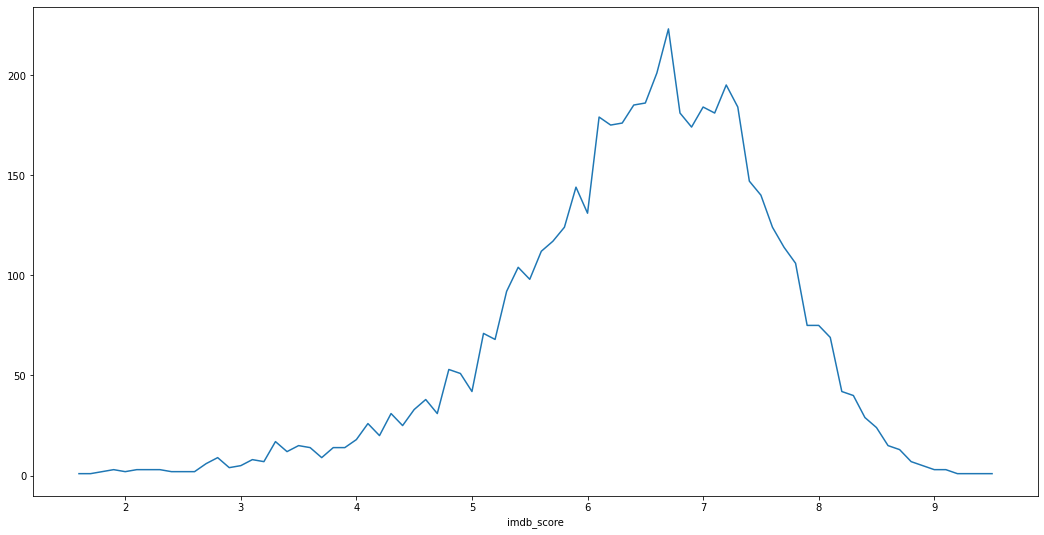

In [11]:
#plotting a graph of how many movies got what rating.
plt.rcParams['figure.figsize']=(18,9)

data_groupby_ratings = data.groupby(['imdb_score'])['movie_title'].count()
data_groupby_ratings.plot()

We can see that out of 5043 movies we have more then over 200 movies rates about 6.5.

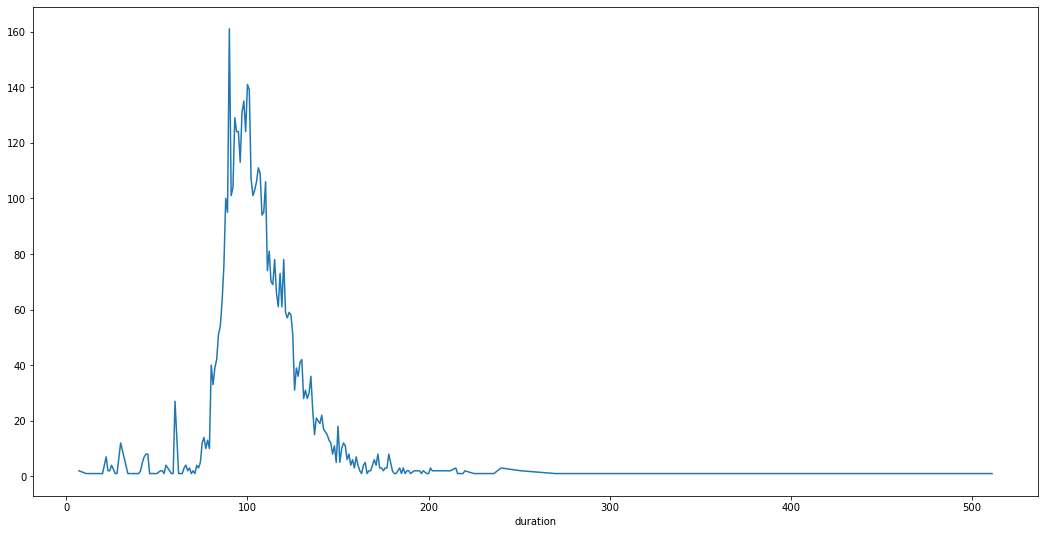

In [12]:
# Plotting a graph of the durationg of the all the movies.
data_groupby_duration = data.groupby(['duration'])['movie_title'].count()
data_groupby_duration.plot()

we can see that most of the movies are between 90-140 mins.

In [13]:
data[data['duration'] <= 100].shape[0]

2179

In [14]:
data[data['duration'] >= 180].shape[0]

68

68 movies have time duration more than equal to 3 hr. average movie time duration is 107 min

In [15]:
# all the different langauges in my movie data set.
data['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

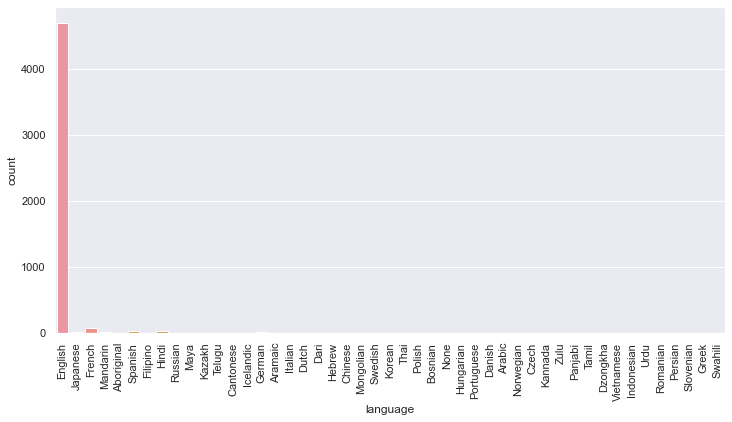

In [16]:
# Plotting a graph to show the amount of movies made in each language. 
sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.countplot(x="language", data = data)
ax = plt.xticks(rotation=90)

As we can see most movies in our data set are in english. This can point to two a few things: 
1. people prefer watching movies in english. 
2. there is more talent in english speaking actors. 
3. people that are watching the movies are english speaking. 

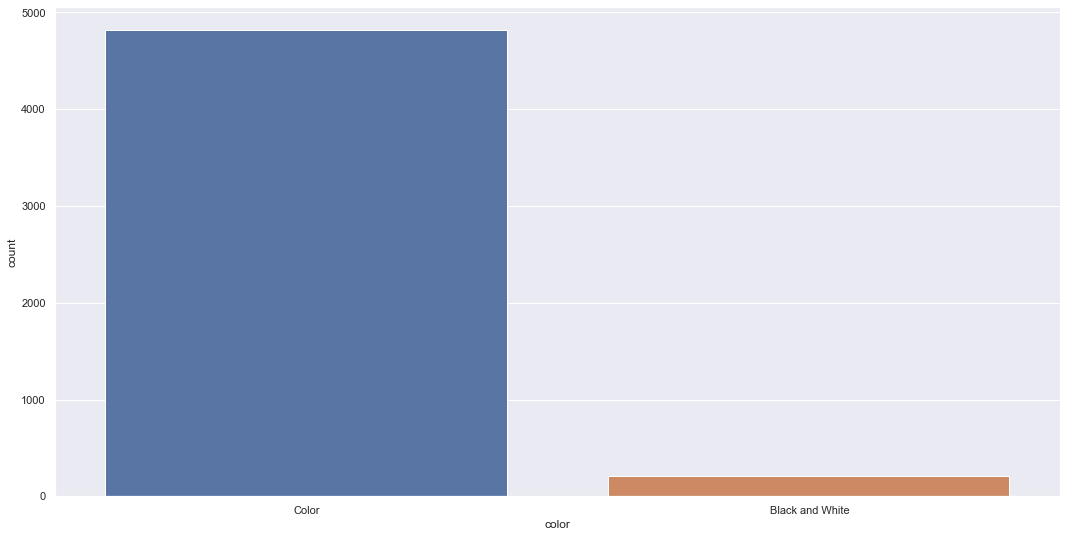

In [17]:
sns.set(style="darkgrid")
sns.countplot(x="color", data = data)

As we can see, people aren't interested in black and white movies, this could be another reason for the rise of the movie industry. The rise of techonology and the price of making movies has become cheaper. People can enjoy a movie more than they used to for a cheaper price. I will look into this deeper 

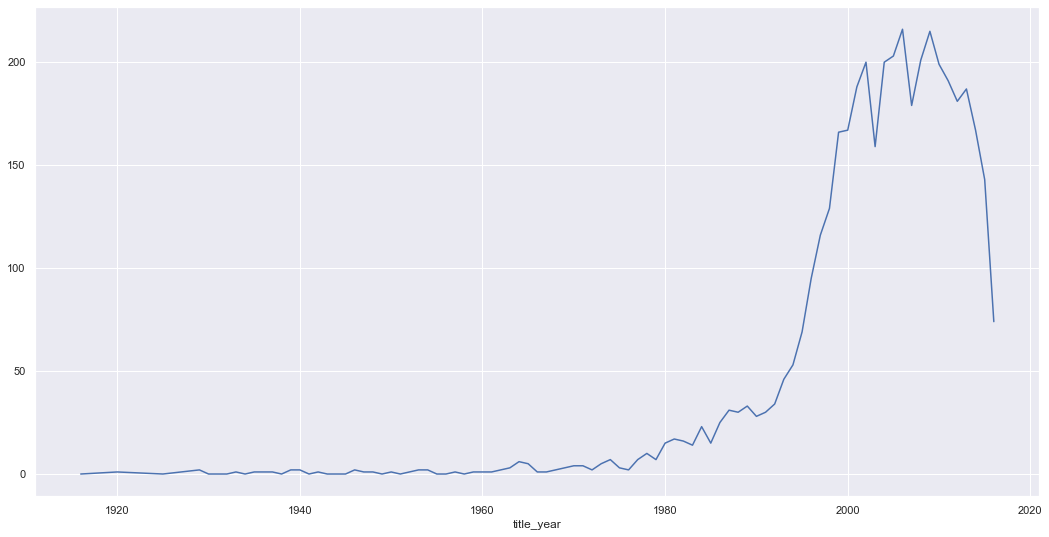

In [18]:
# plot title year vs gross
data_groupby_gross = data.groupby(['title_year'])['gross'].count()
data_groupby_gross.plot()

We can see through the years movies have been generating a lot more money.

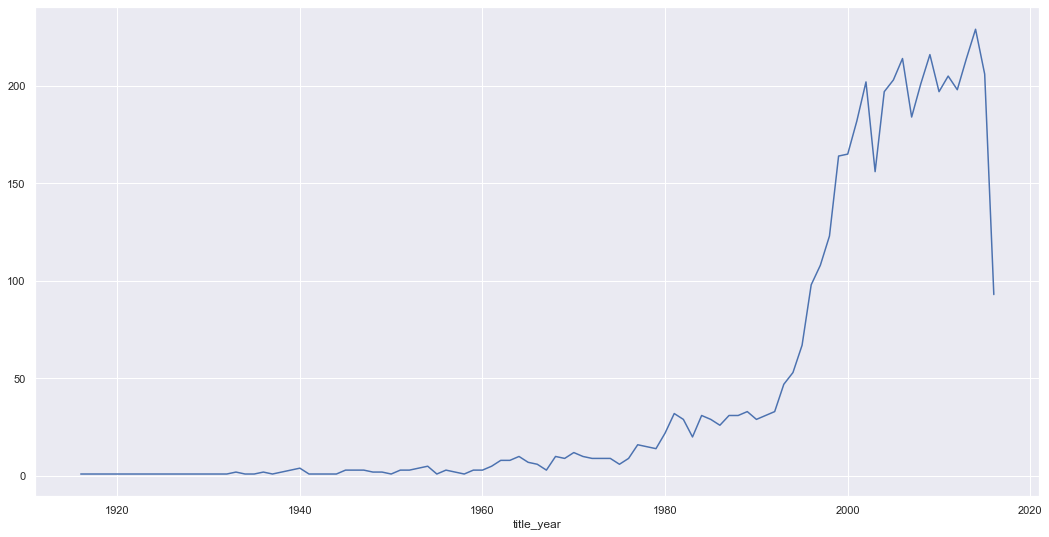

In [19]:
#ploting buget vs title_year
data_groupby_gross = data.groupby(['title_year'])['budget'].count()
data_groupby_gross.plot()

From both of these graphs we can see that the movie industry has grown exponentially in the past century

In [20]:
data[data['language'] == 'English'].shape[0] 

4704

Just to point out how many movies are in English again, 4704 out of 5048

### Top 10 IMDb rated movies

In [21]:
highest_imdb = data.sort_values('imdb_score', ascending = False)
high = highest_imdb.loc[:,['movie_title', 'imdb_score','title_year', 'language', 'country', 'budget', 'director_name', 'duration', 'gross' ]]
high.head(10)

,movie_title,imdb_score,title_year,language,country,budget,director_name,duration,gross
2765,Towering Inferno,9.5,NaN,English,Canada,NaN,John Blanchard,65.0,NaN
1937,The Shawshank Redemption,9.3,1994.0,English,USA,25000000.0,Frank Darabont,142.0,28341469.0
3466,The Godfather,9.2,1972.0,English,USA,6000000.0,Francis Ford Coppola,175.0,134821952.0
4409,Kickboxer: Vengeance,9.1,2016.0,NaN,USA,17000000.0,John Stockwell,90.0,NaN
2824,Dekalog,9.1,NaN,Polish,Poland,NaN,NaN,55.0,447093.0
3207,Dekalog,9.1,NaN,Polish,Poland,NaN,NaN,55.0,447093.0
66,The Dark Knight,9.0,2008.0,English,USA,185000000.0,Christopher Nolan,152.0,533316061.0
2837,The Godfather: Part II,9.0,1974.0,English,USA,13000000.0,Francis Ford Coppola,220.0,57300000.0
3481,Fargo,9.0,NaN,English,USA,NaN,NaN,53.0,NaN
339,The Lord of the Rings: The Return of the King,8.9,2003.0,English,USA,94000000.0,Peter Jackson,192.0,377019252.0


In [22]:
#find proportion of missing values
prop_missing = round((data[data.columns[:]].isnull().sum()/data.shape[0])*100,2)
prop_missing

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [23]:
col_filling = []
for s in data.columns:
    ratio = (len(data[s])-data[s].isnull().sum()) / len(data[s])*100
    number = data[s].notnull().sum()
    col_filling.append([ratio, s, number])
col_filling.sort(key = lambda x:x[0])
#------------------------------------
for ratio, s, number in col_filling:
    print("{:<30} -> {:<6}%".format(s, round(ratio,2)))

gross                          -> 82.47 %
budget                         -> 90.24 %
aspect_ratio                   -> 93.48 %
content_rating                 -> 93.99 %
plot_keywords                  -> 96.97 %
title_year                     -> 97.86 %
director_name                  -> 97.94 %
director_facebook_likes        -> 97.94 %
num_critic_for_reviews         -> 99.01 %
actor_3_facebook_likes         -> 99.54 %
actor_3_name                   -> 99.54 %
num_user_for_reviews           -> 99.58 %
color                          -> 99.62 %
duration                       -> 99.7  %
actor_2_name                   -> 99.74 %
facenumber_in_poster           -> 99.74 %
actor_2_facebook_likes         -> 99.74 %
language                       -> 99.76 %
actor_1_facebook_likes         -> 99.86 %
actor_1_name                   -> 99.86 %
country                        -> 99.9  %
genres                         -> 100.0 %
movie_title                    -> 100.0 %
num_voted_users                -> 

We can see that the data is well filled since only two of the variables are less than 93%

In [24]:
#Remove the missing data with title year missing
clean_data = data[data.title_year.notnull() & data.duration.notnull()]
len(clean_data)

4923

In [25]:
#describe the dataset
clean_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4885.000000,4923.000000,4923.000000,4906.000000,4916.000000,4.154000e+03,4.923000e+03,4923.000000,4910.000000,4910.000000,4.538000e+03,4923.000000,4913.000000,4923.000000,4627.000000,4923.000000
mean,142.809212,108.167378,688.581353,652.106400,6680.215216,4.852584e+07,8.507018e+04,9858.146049,1.359878,277.104481,3.983029e+07,2002.452163,1679.045186,6.418769,2.128965,7612.714199
std,121.592375,22.541217,2817.656735,1683.131836,15169.990429,6.847414e+07,1.397094e+05,18339.570916,2.001990,380.852747,2.064023e+08,12.482442,4085.578189,1.112902,0.789255,19474.099601
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,53.000000,94.000000,7.000000,133.250000,621.750000,5.356829e+06,9.058500e+03,1431.000000,0.000000,68.000000,6.000000e+06,1999.000000,282.000000,5.800000,1.850000,0.000000
50%,112.000000,104.000000,49.000000,372.000000,995.500000,2.554347e+07,3.513700e+04,3132.000000,1.000000,160.000000,2.000000e+07,2005.000000,599.000000,6.500000,2.350000,166.000000
75%,197.000000,118.000000,197.000000,637.000000,11000.000000,6.232050e+07,9.827350e+04,14032.000000,2.000000,332.000000,4.500000e+07,2011.000000,922.000000,7.200000,2.350000,3000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


## 1.2 Number of films per year
The variable 'title_year' deals with the year the films came out. In order to have a global look at the way films are distributed according to this variable, I group the films by decades:

In [26]:
#Get data required for the plot
df_1 = clean_data[['title_year', 'movie_title']]
ser = df_1.groupby(df_1.title_year.astype(int) // 10 * 10).size()
df = pd.DataFrame({'decade':ser.index, 'movies':ser.values})

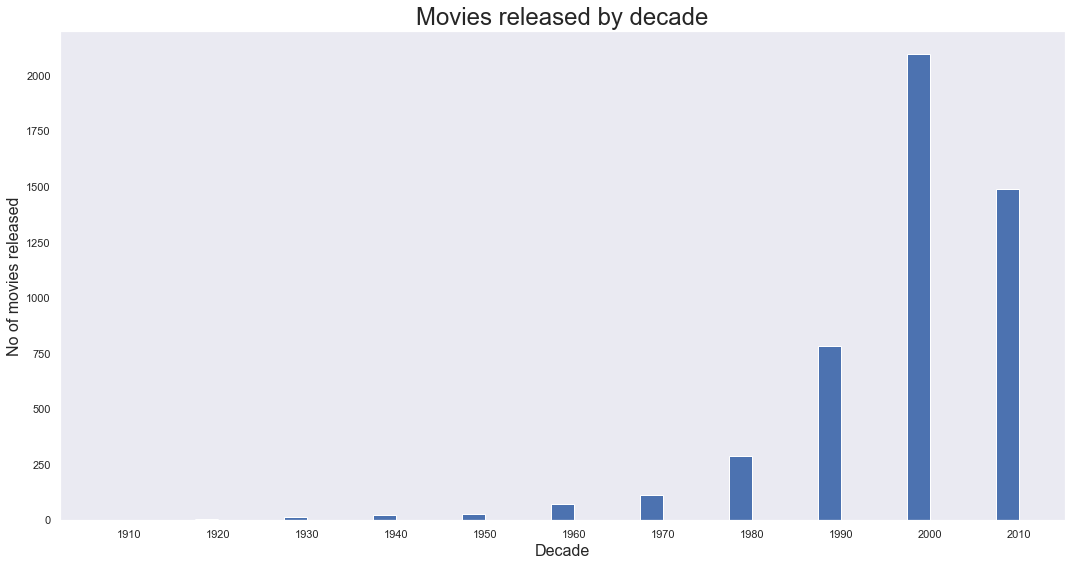

In [27]:
#Plot using plt.subplots
fig,ax = plt.subplots()
ax.bar(df.decade, df.movies, width=2.6, color='b')
ax.set_xticks(df.decade+1.3)  # set the x ticks to be at the middle of each bar since the width of each bar is 2.6
ax.set_xticklabels(df.decade)  #replace the name of the x ticks with your Groups name
ax.grid(False) #remove gridlines
plt.xlabel('Decade', fontsize=16)
plt.ylabel('No of movies released', fontsize=16)
plt.title('Movies released by decade', fontsize=24)
plt.show()

This graph shows a massive trend in the movie industry. 
The data i have is only up to 2014, that's the reason in 2010 there is a drop in the movies.

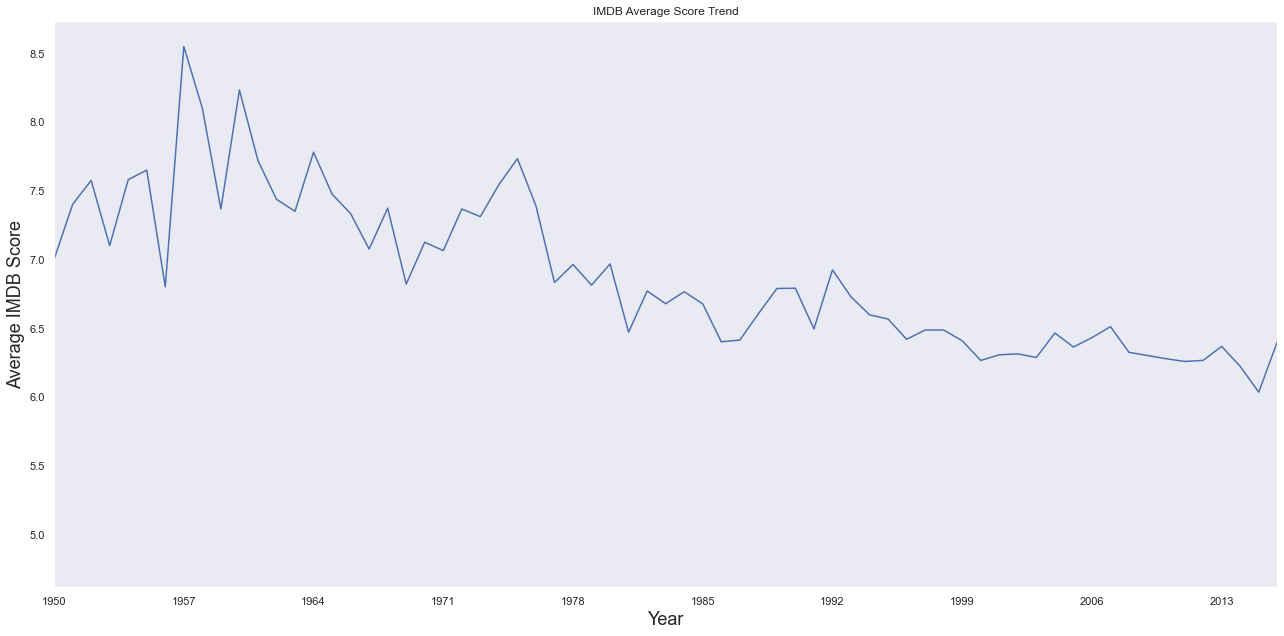

In [28]:
#get data
temp2 = clean_data[['title_year', 'imdb_score']]
#plot
temp2 = temp2.groupby(temp2.title_year.astype(int)).imdb_score.mean().plot(kind ='line', grid =False, title ='IMDB Average Score Trend', xlim=((1950, 2016)))
temp2.xaxis.set_ticks(np.arange(1950, 2016, 7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average IMDB Score', fontsize=18)
plt.tight_layout()

It looks like the avg score of movies is decreasing over the years, however this could be due to the result of inscreasing amount of movies being produced, we will check that more in the graph below.

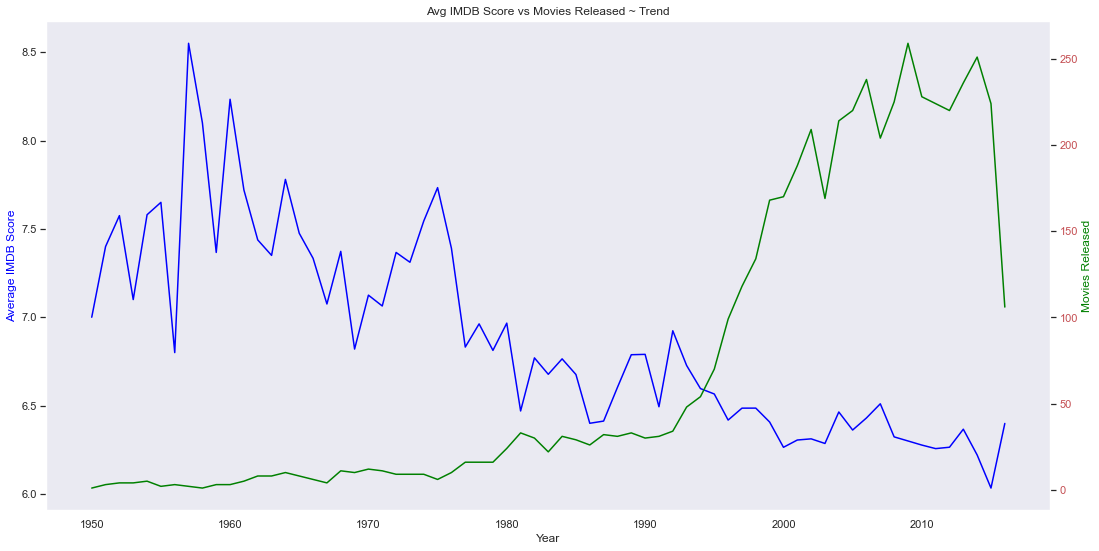

In [29]:
#create new table with grouped information
temp = clean_data[['title_year', 'imdb_score', 'movie_imdb_link']]
temp = temp[temp.title_year.astype(int)>1949]
res = temp.groupby(temp.title_year.astype(int)).agg({'imdb_score': 'mean', 'movie_imdb_link': 'count'}).reset_index()
res.columns = ['title_year', 'avg_imdb_score', 'movies_created']
rows = res.title_year

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(res.title_year, res.avg_imdb_score, color = 'blue')
ax1.set_ylabel('Average IMDB Score', color = 'blue')
ax1.set_xlabel('Year')
ax1.grid(False)
#ax1.legend(loc = 'upper right')


ax2 = ax1.twinx()
ax2.plot(res.title_year, res.movies_created, color='green')
ax2.set_ylabel('Movies Released', color = 'green')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.legend(loc = 'upper right')
plt.title('Avg IMDB Score vs Movies Released ~ Trend')

plt.show()
#plt.savefig('images/two-scales-5.png')

As we can see, the decrease in average movie scores can be attributed to the increase in amount of movies created in recent times, the increase in amount of movies will lead to more outliers affecting the mean for the duration.

### Movie prediction using Knn


Cleaning the data to fit the Knn model best, that way my prediction will be most accurate.
1. remove all Nan data. 
2. chamge the IMDb rating to binary rating, {0,1}
3. removie all the unnecessary features. (must explain why i have removed them)
4. use dummies for the data that is still under objects or numbers
5. change other objects that are yes or not types to binary {1,0}.

In [30]:
# Removing all the Nan data and duplicates.
dataset_knn = data.copy()
print(dataset_knn.shape)
dataset_knn = dataset_knn.dropna(axis = 0)
print(dataset_knn.shape)
dataset_knn= dataset_knn.drop_duplicates(['movie_title'])
dataset_knn = dataset_knn.reset_index(drop=True)
print(dataset_knn.shape)

(5043, 28)
(3756, 28)
(3655, 28)


In [31]:
# Changing the data to binary value 0 = (0-6.5) and 1 = (6.5-10)
imdb_score1=[]
for i in dataset_knn["imdb_score"]:
    if i >=6.5:
        imdb_score1.append(1)
    else:
        imdb_score1.append(0)
dataset_knn["imdb_score"]=imdb_score1

In [32]:
# Changing the color value, color = 1 and black and white = 0.
Bcolor=[]
for i in dataset_knn["color"]:
    if i =="color":
        Bcolor.append(1)
    else:
        Bcolor.append(0)
dataset_knn["color"]=Bcolor

In [33]:
# Changing the language value, english = 1 else = 0.
Nlanguage=[]
for i in dataset_knn["language"]:
    if i =="English":
        Nlanguage.append(1)
    else:
        Nlanguage.append(0)
dataset_knn["language"]=Nlanguage

The features i will be removing are all the String value ones that will not affect the data:
1. directors name (only his rating is relevent)
2. actors' names (only his rating is relevent)
3. movie title (only the movie rating is relevent)
4. genres (the movies rating is relevent)
5. plot keywords (keywords aren't important for the rating)
6. movie imdb link (the link doesn't affect the rating)
7. content rating (content rating doesnt affect the rating the movie gets, since young kids dont give reviews)
8. aspect ratio

In [34]:
dataset_knn = dataset_knn.drop(['director_name', 'actor_2_name', 'genres',
                                'actor_1_name', 'movie_title', 'actor_3_name',
                                'plot_keywords', 'movie_imdb_link', 'content_rating' ,
                               'aspect_ratio', 'country'], axis=1)
dataset_knn.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,1,237000000.0,2009.0,936.0,1,33000
1,0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,1,300000000.0,2007.0,5000.0,1,0
2,0,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,1,245000000.0,2015.0,393.0,1,85000
3,0,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,1,250000000.0,2012.0,23000.0,1,164000
4,0,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,1,263700000.0,2012.0,632.0,1,24000


In [35]:
#Using the dummies data set
y = dataset_knn['imdb_score'].values
X = dataset_knn.drop(columns = ['imdb_score'])
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X,y)
dummy_clf.predict(X)
dummy_clf.score(X,y)
#getting dummy classifier score to know how well i'm actually scoring on my model

0.546374829001368

## Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [37]:
x = dataset_knn.drop('imdb_score', axis=1)
y= dataset_knn.imdb_score
print(x.shape)
print(y.shape)

(3655, 16)
(3655,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2558, 16)
(2558,)
(1097, 16)
(1097,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))

The accuracy of the knn classifier is 0.72 out of 1 on training data
The accuracy of the knn classifier is 0.60 out of 1 on test data


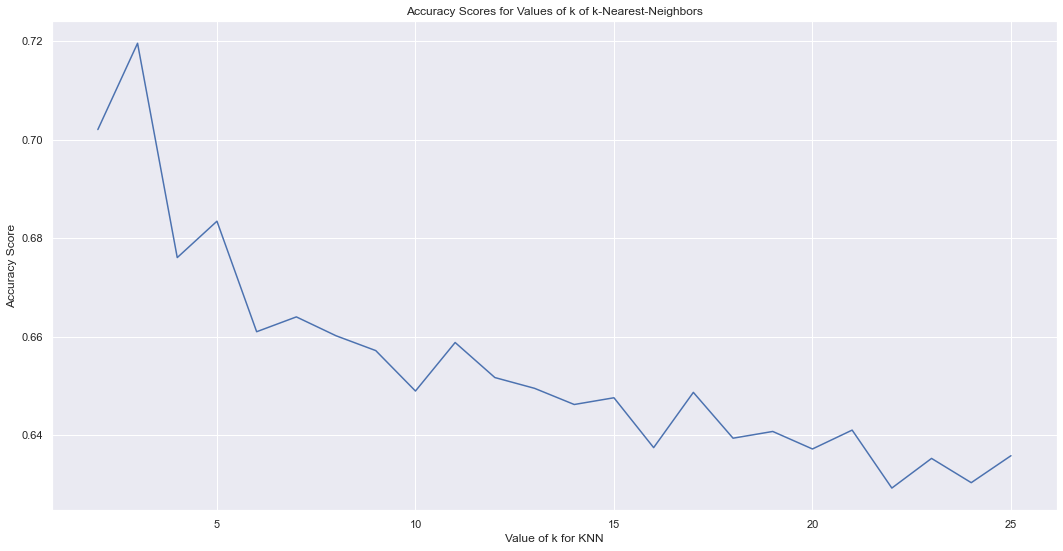

In [41]:
k_range = list(range(2,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

I can see that my model isn't so accurate and this can be beacuse of the correlation and because of the normlization, i will check both of them next. 

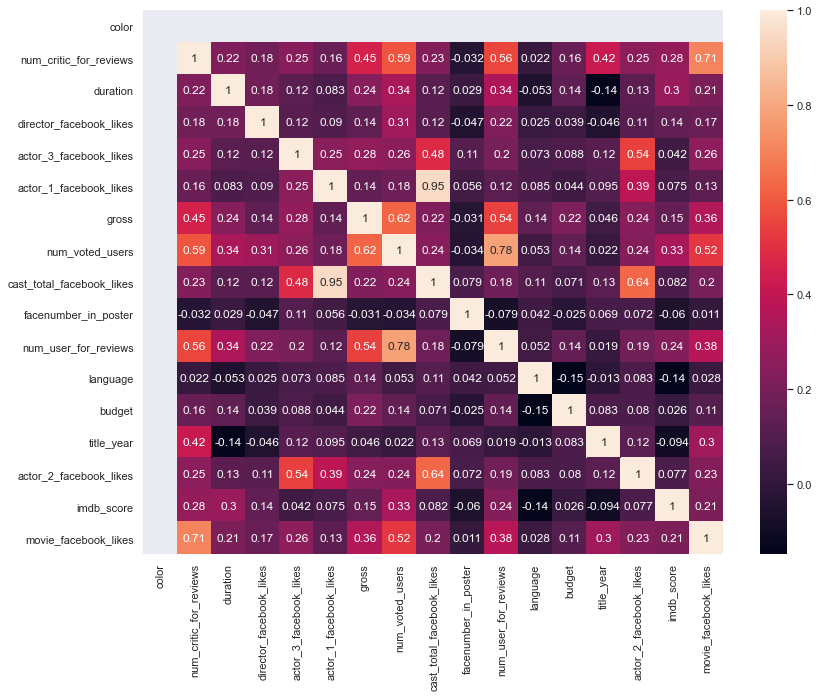

In [42]:
plt.figure(figsize=(13, 10))
sns.heatmap(dataset_knn.corr(), annot = True);

## Scaling the data:
one reason the prediction might not be so accurate is related to the fact the most the data isnt sacled, we will scale the data and see if this makes any changes. 

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_knn[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes',
           'gross', 'num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget', 'actor_2_facebook_likes',
           'movie_facebook_likes']] = scaler.fit_transform(dataset_knn[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes',
           'gross', 'num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget', 'actor_2_facebook_likes',
           'movie_facebook_likes']])
dataset_knn.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0,0.889026,0.481229,0.000000,0.037174,0.001563,1.000000,0.524429,0.007361,0.0,0.603244,1,0.056429,2009.0,0.006832,1,0.094556
1,0,0.369914,0.450512,0.024478,0.043478,0.062500,0.406840,0.278829,0.073622,0.0,0.244066,1,0.071429,2007.0,0.036496,1,0.000000
2,0,0.739827,0.378840,0.000000,0.007000,0.017188,0.263080,0.163213,0.017816,1.0,0.195807,1,0.058333,2015.0,0.002869,1,0.243553
3,0,1.000000,0.433447,0.956522,1.000000,0.042188,0.589253,0.677200,0.162561,0.0,0.533426,1,0.059524,2012.0,0.167883,1,0.469914
4,0,0.567201,0.324232,0.020652,0.023043,0.001000,0.096066,0.125535,0.002852,1.0,0.145174,1,0.062786,2012.0,0.004613,1,0.068768


In [44]:
x = dataset_knn.drop('imdb_score', axis=1)
y = dataset_knn.imdb_score
print(x.shape)
print(y.shape)

(3655, 16)
(3655,)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2193, 16)
(2193,)
(1462, 16)
(1462,)


In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))

The accuracy of the knn classifier is 0.76 out of 1 on training data
The accuracy of the knn classifier is 0.61 out of 1 on test data


In [47]:
KNN_Score = knn.score(x_test, y_test)

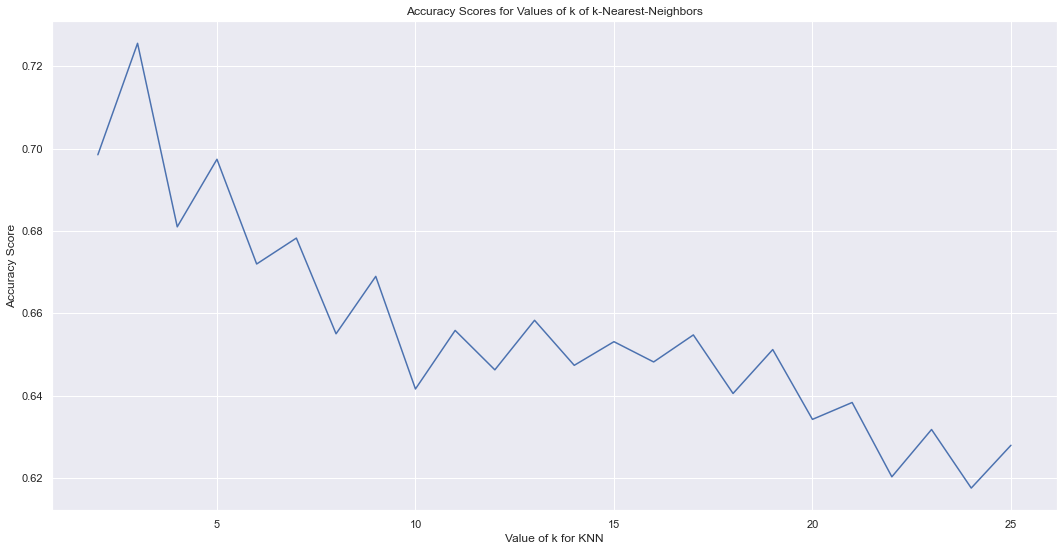

In [48]:
k_range = list(range(2,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [49]:
from sklearn.metrics import plot_confusion_matrix

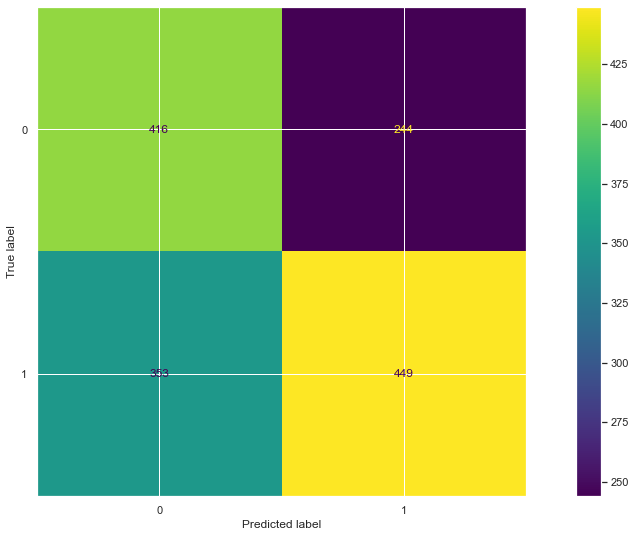

In [50]:
plot_confusion_matrix( knn, x_test , y_test)

In [51]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['good movie', 'bad movie']
report = classification_report(y_test, knn.predict(x_test), target_names=target_names)
print(report)

              precision    recall  f1-score   support

  good movie       0.54      0.63      0.58       660
   bad movie       0.65      0.56      0.60       802

    accuracy                           0.59      1462
   macro avg       0.59      0.60      0.59      1462
weighted avg       0.60      0.59      0.59      1462



## Evaluation:
I can see that after checking my correlation and scaling my data there is no change at all to the result. 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6634746922024624


In [54]:
logreg_Score = metrics.accuracy_score(y_test, y_pred)
logreg_Score

0.6634746922024624

In [55]:
from sklearn.metrics import plot_confusion_matrix

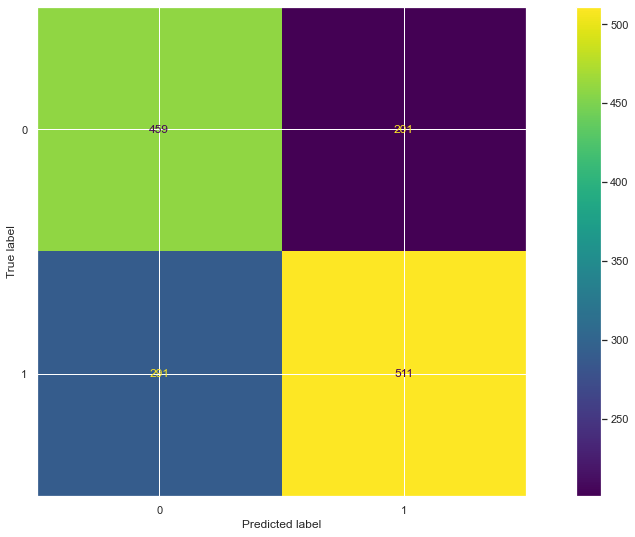

In [56]:
plot_confusion_matrix( logreg, x_test , y_test)

In [57]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['good movie', 'bad movie']
report = classification_report(y_test, knn.predict(x_test), target_names=target_names)
print(report)

              precision    recall  f1-score   support

  good movie       0.54      0.63      0.58       660
   bad movie       0.65      0.56      0.60       802

    accuracy                           0.59      1462
   macro avg       0.59      0.60      0.59      1462
weighted avg       0.60      0.59      0.59      1462



### Conclusion:
In this project I worked through a data-set of movies, my aim was to class the imdb score into two calssed, good movie and bad movie based on there grade. Throug out the project i could see different corrolation to why a movie is graded higher or lower. Both my models didn't give a high prediction, I think the reason for this is that i split my imbd score into two classes and i should have left the results as they were and then deciding if a movie a good or bad movie.
As for the logistic regression, since it anyways maps things between 0 and 1 it makes a lot of sense that it has a higher accuracy score

## This part of the project is from the second semester. The main goal is to try and get better results using the tools we learnt during the second semester

## One of the new methods we learnt is "Ensemble learning" 

## So what is "Ensemble learning ?
Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation, etc.) performance of a model, or reduce the likelihood of an unfortunate selection of a poor one

### There are many types of models which use Ensemble learning, i will show just a few and compare them with the models I used last semester 

## Boosting:
Similar to bagging, boosting also creates an ensemble of classifiers by resampling the data, which are then combined by majority voting. However, in boosting, resampling is strategically geared to provide the most informative training data for each consecutive classifier. In essence, each iteration of boosting creates three weak classifiers: the first classifier C1 is trained with a random subset of the available training data. The training data subset for the second classifier C2 is chosen as the most informative subset, given C1 . Specifically, C2 is trained on a training data only half of which is correctly classified by C1 , and the other half is misclassified. The third classifier C3 is trained with instances on which C1 and C2 disagree. The three classifiers are combined through a three-way majority vote.

## AdaBoosting

In [58]:
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)
Ada_score = model.score(x_test, y_test)
Ada_score

0.7482900136798906

using the AdaBoosting methos for calssification has already improved my score by more then 10%

### Xgboosting
lets try another method see if out result gets even better 

In [59]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)
Xg_score = model.score(x_test, y_test)
Xg_score

C:\Users\arieh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\arieh\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.780437756497948

## Stacking:
an ensemble of classifiers is first trained using bootstrapped samples of the training data, creating Tier 1 classifiers, whose outputs are then used to train a Tier 2 classifier (meta-classifier) (Wolpert 1992). The underlying idea is to learn whether training data have been properly learned. For example, if a particular classifier incorrectly learned a certain region of the feature space, and hence consistently misclassifies instances coming from that region, then the Tier 2 classifier may be able to learn this behavior, and along with the learned behaviors of other classifiers, it can correct such improper training.

In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

clf = StackingClassifier( estimators = estimators,
         final_estimator=RandomForestClassifier(n_estimators=10,
                                           random_state=42))
Stacking_score = clf.fit(x_train, y_train).score(x_test, y_test)
Stacking_score

C:\Users\arieh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\arieh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\arieh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\arieh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\arieh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.6778385772913816

## Decision Tree 
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)
DT_score = dt_clf.score(x_test, y_test)
DT_score

0.7277701778385773

### Comparing models 

In [62]:
# comparing models 
model=["KNN","Logistic Regression", "Decision Tree", "Stacking", "AdaBoosting", "XgBoosting"]
values=[KNN_Score, logreg_Score, DT_score, Stacking_score, Ada_score, Xg_score]
table=pd.DataFrame({"Models":model,"R squared":values})
display(table)

,Models,R squared
0,KNN,0.606019
1,Logistic Regression,0.663475
2,Decision Tree,0.727770
3,Stacking,0.677839
4,AdaBoosting,0.748290
5,XgBoosting,0.780438


### Updated Conclusion

From what we have learned during the second semester, I have used different types of ensamble learning.
as we can see from the graph above, my results from the first semester were from the KNN and from the Logreg, we can see that all the ensamble learning methods gave a better result. My main problem with this project was chosing the wrong type of data for a clasification project, in the future I will know better what data to use.